In this exercise we perform a simple event simulation that allows to exercise some of the techniques that you have seen in the lecture. The simulator looks a lot like that used in the lectures (except that it is now implemented in python, rather than ROOT macros). The coordinate system is chosen such that the horizontal axis is 'z' and the vertical axis 'x'. Charged particles are generated approximately at the origin (0,0) and leave hits in a set of 6 planes. Coordinate units are in centimeters. Each detector plane has a fixed z-coordinate and extends in x from -50 to +50 cm. The hit resolution is about 1 mm and the hit efficiency of the detector planes is about 95% . The following few lines generate and display an event:

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

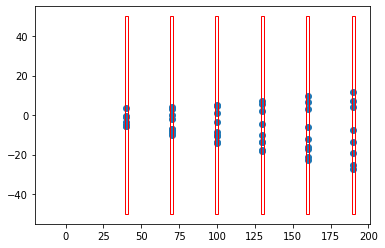

In [1]:
# specify the seed, such that everybody works with the same event
import numpy as np
np.random.seed(1)
# configure the detector 
import eventgenerator as simulator
det   = simulator.configureDetector()
# simulate an event
event = simulator.generateEvent(det)
simulator.drawEvent(event, det)

The generated event has a set of particles each of which has a set of associated hits:

In [2]:
for idx, p in enumerate(event.particles()):
    print("particle %d: x0= %f, tx0=%f, number of hits=%d" 
          % (idx,p.stateAtOrigin().x(),p.stateAtOrigin().tx(),len(p.hits())))
    if idx==0:
        for h in p.hits():
            print("hit z, x, sigma: ", h.z(),h.x(), h.plane().resolution())

particle 0: x0= -2.499428, tx0=-0.059300, number of hits=6
hit z, x, sigma:  40.0 -4.982030761932029 0.1
hit z, x, sigma:  70.0 -6.815895645885297 0.1
hit z, x, sigma:  100.0 -8.531152360604784 0.1
hit z, x, sigma:  130.0 -10.14472161186539 0.1
hit z, x, sigma:  160.0 -12.073455300258368 0.1
hit z, x, sigma:  190.0 -13.589210722961862 0.1
particle 1: x0= -1.798065, tx0=-0.090570, number of hits=6
particle 2: x0= -2.408559, tx0=0.075043, number of hits=5
particle 3: x0= -0.042134, tx0=-0.133991, number of hits=6
particle 4: x0= 2.222974, tx0=0.025967, number of hits=6
particle 5: x0= 1.254712, tx0=-0.045330, number of hits=6
particle 6: x0= -2.485648, tx0=0.035143, number of hits=6
particle 7: x0= 1.057624, tx0=-0.112719, number of hits=5
particle 8: x0= 0.305151, tx0=-0.144406, number of hits=6


**Exercise 1: Implement a function that performs a minimum chi-square fit that estimates the track parameters (x0,tx0) at the origin from the hit coordinates.**

The trackmodel is 
```
x(z) = alpha0 + alpha1*z
```
where alpha0 and alpha1 are the track parameters x0 and tx0. 

The steps are:
* define a structure for your parameters, for the chi2, and for the chi2 derivatives, for instance
```
alpha = np.array( [0,0] )  # initial parameters. you can choose these as you like: for a linear fit it does not matter.
chi2  = 0.0                       # will hold the sum of the chi2 contributions
dChi2dAlpha   = np.zeros( 2 )     # first derivative of chi2 to parameters (a vector)
d2Chi2dAlpha2 = np.zeros( 2, 2 )  # second derivative of chi2 to parameters (a 3x3 matrix)
```
* loop over the points and fill the contributions to chi2 and derivatives. The 'sigma' for the measurements can be accessed from the hit as shown above.
* solve the linear system either by inverting the second derivative 
```
   d2Chi2dAlpha2Inv = np.linalg.inv(d2Chi2dAlpha2)
   deltaalpha       = - d2Chi2dAlpha2Inv.dot(dChi2dAlpha)
```
   or by using np.linalg.solve (which also does something sensible of your matrix is not invertible)
```
   deltaalpha        = - np.linalg.solve( d2Chi2dAlpha2, self.dChi2dAlpha )
```
* compute also the covariance matrix for alpha, and the chi2 value *after* the fit. For the latter, you can either loop over the hits again to add up the residuals squared (divided by the variance), or you can use the chi2 value computed during the first loop, provided that you subtract the expected change in chi2.
* there is an advantage to implementing the fit as an iterative fit, where in each subsequent iteration you use the alpha of the previous iteration to compute residuals. Since the problem is linear, in the second iteration you should find that delta-alpha is zero.

Once you are done, make a few histograms, for instance of:
* the fit chi2 (eventually per degree of freedom)
* the estimated parameter resolution 
* the pull distribution of the parameters. (You can access the 'true' values using particle.stateAtOrigin().)
* the hit residuals. Is the distribution wider or narrower than the hit resolution?

The 'event' has a 'hits()' method that will return you the set of hits in the event:

In [3]:
for hit in event.hits()[0:10]:
    print(hit.z(),hit.x())

40.0 -4.982030761932029
40.0 -5.347849878363901
40.0 -5.486304226343216
40.0 3.471659779625866
40.0 -0.46999360970213094
40.0 -0.9922925092838961
40.0 -3.439223798610919
40.0 -5.402597782204425
70.0 -6.815895645885297
70.0 -8.100634657335084


**Exercise 2: Implement a 'track finding method' to recover the particles from the hits.**

I suggest to use a hough transform, with as feature space the track parameters (x0, tx0) at the origin.
(I haven't done this yet myself in python, so I'm interested in how you will solve this.) However, you can also use a nother method, for instance by creating seeds from hits in the first and last plane, and count hits close to the seed.

The event generator generates particles with a Poisson distributed multiplicity. By generating and analyzing a number of events, can you find out what the average multiplicity was?

**Exercise 3: Find the misaligned plane**

If you slightly modify the way you generate the events, the simulator introduces a small misalignment in one of the planes:

```
det   = simulator.configureDetector(mode=2)
```

Can you figure out which plane that was, and by how much it is misaligned?